Preview:


,Customer_ID,Age,Monthly_Spend,Tenure_Months,Churn
0,1,56,158,2,Yes
1,2,46,610,20,No
2,3,32,781,28,Yes
3,4,60,575,47,No
4,5,25,799,7,No



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    30 non-null     int64 
 1   Age            30 non-null     int64 
 2   Monthly_Spend  30 non-null     int64 
 3   Tenure_Months  30 non-null     int64 
 4   Churn          30 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.3+ KB
None

Missing values:
Customer_ID      0
Age              0
Monthly_Spend    0
Tenure_Months    0
Churn            0
dtype: int64


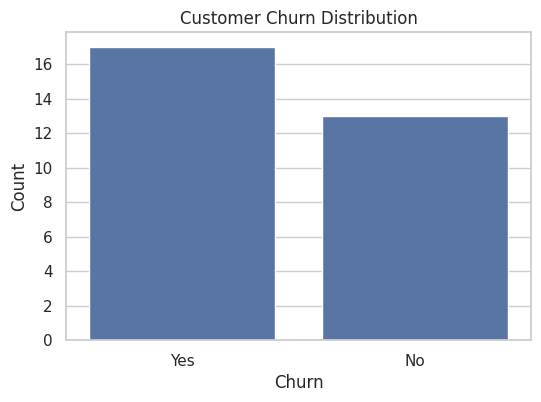

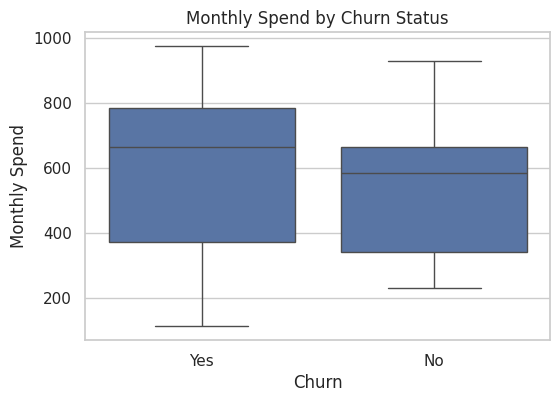

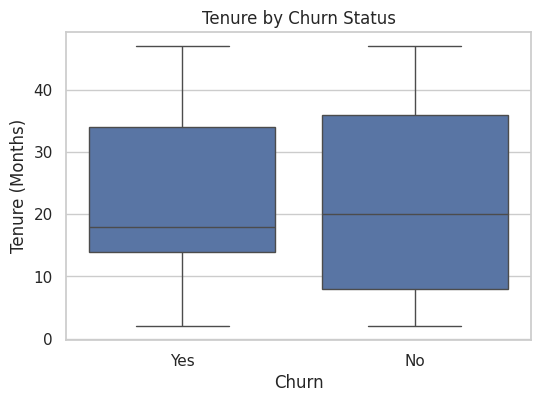


Average metrics by churn status:


,Monthly_Spend,Tenure_Months,Age
Churn,,,
No,568.54,22.77,42.00
Yes,581.65,22.71,40.88



Key Insights (business-friendly):
- Churn vs Non-churn patterns are visible across tenure and spend.
- Focus retention efforts on early-tenure customers (typically higher churn risk).
- Use spend + tenure to prioritise outreach (high spend + short tenure = high priority).

Sample output with retention priority flag:


,Customer_ID,Age,Monthly_Spend,Tenure_Months,Churn,Retention_Priority
0,1,56,158,2,Yes,Normal
1,2,46,610,20,No,Normal
2,3,32,781,28,Yes,Normal
3,4,60,575,47,No,Normal
4,5,25,799,7,No,High
5,6,38,882,44,Yes,Normal
6,7,56,289,8,No,Normal
7,8,36,786,47,Yes,Normal
8,9,40,662,35,No,Normal
9,10,28,975,14,Yes,Normal


In [1]:
# ==========================================
# Business Requirements to Analytics Solution
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# -------------------------
# 1) Create / Load Dataset
# -------------------------
np.random.seed(42)

data = {
    "Customer_ID": range(1, 31),
    "Age": np.random.randint(18, 65, 30),
    "Monthly_Spend": np.random.randint(100, 1000, 30),
    "Tenure_Months": np.random.randint(1, 48, 30),
    "Churn": np.random.choice(["Yes", "No"], 30)
}

df = pd.DataFrame(data)

print("Preview:")
display(df.head())

# -------------------------
# 2) Data Inspection
# -------------------------
print("\nInfo:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

# -------------------------
# 3) Quick EDA
# -------------------------
# Churn distribution
churn_counts = df["Churn"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Customer Churn Distribution")
plt.ylabel("Count")
plt.xlabel("Churn")
plt.show()

# Spend vs churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Churn", y="Monthly_Spend")
plt.title("Monthly Spend by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Spend")
plt.show()

# Tenure vs churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Churn", y="Tenure_Months")
plt.title("Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

# Optional: simple group stats
group_stats = df.groupby("Churn")[["Monthly_Spend", "Tenure_Months", "Age"]].mean().round(2)
print("\nAverage metrics by churn status:")
display(group_stats)

# -------------------------
# 4) Business Insights
# -------------------------
avg_yes = group_stats.loc["Yes"] if "Yes" in group_stats.index else None
avg_no = group_stats.loc["No"] if "No" in group_stats.index else None

print("\nKey Insights (business-friendly):")
print("- Churn vs Non-churn patterns are visible across tenure and spend.")
print("- Focus retention efforts on early-tenure customers (typically higher churn risk).")
print("- Use spend + tenure to prioritise outreach (high spend + short tenure = high priority).")

# Simple rule-based flag (example)
df["Retention_Priority"] = np.where(
    (df["Tenure_Months"] <= 12) & (df["Monthly_Spend"] >= df["Monthly_Spend"].median()),
    "High",
    "Normal"
)

print("\nSample output with retention priority flag:")
display(df.head(10))
